# Building your Deep Neural Network: Step by Step

Chào mừng bạn đến với bài tập tuần 4 (phần 1/2)! 
Trước đây bạn đã đào tạo Mạng nơ ron 2 lớp (với một lớp ẩn duy nhất). 
Tuần này, bạn sẽ xây dựng một mạng nơ-ron sâu, với bao nhiêu lớp tùy thích!

* Trong sổ tay này, bạn sẽ thực hiện tất cả các chức năng cần thiết để xây dựng một mạng nơ-ron sâu.
* Trong bài tập tiếp theo, bạn sẽ sử dụng các chức năng này để xây dựng một mạng nơron sâu để phân loại hình ảnh

**Sau nhiệm vụ này, bạn sẽ có thể:**

*Sử dụng các đơn vị phi tuyến tính như ReLU để cải thiện mô hình của bạn
*Xây dựng mạng nơ-ron sâu hơn (với nhiều hơn 1 lớp ẩn)
*Triển khai một lớp mạng thần kinh dễ sử dụng

**Notation:**

* Chỉ số trên $[l]$  biểu thị một số lượng được liên kết với  $l^{th}$ lớp
  * Ví dụ :$a^{[L]}$ là các $L^{th}$m lớp kích hoạt $W^{[L]}$ và $b^{[L]}$ là các $L^{th}$ lớp tham số.
* Chỉ số trên $(i)$ biểu thị một số lượng được liên kết với $i^{th}$ ví dụ.
  * Ví dụ : $x^{(i)}$ là các $i^{th}$ ví dụ đâo tạo
* Tập lệnh thấp hơn $i$ biểu thi các $i^{th}$ mục nhập của 1 vecto
  * Ví dụ $a^{[l]}_i$ biểu thị các $i^{th}$ mục nhập của $l^{th}$ các lớp kích hoat).

Let's get started!

## 1 - Packages

Đầu tiên, hãy nhập tất cả các thư viện mà bạn sẽ cần trong quá trình chạy mạng nơ-ron này.

* numpy là gói chính cho tính toán khoa học với Python.
* matplotlib là một thư viện để vẽ đồ thị bằng Python.
* rnn_utils cung cấp một số chức năng cần thiết cho sổ tay này.
* các testCase cung cấp một số trường hợp thử nghiệm để đánh giá tính đúng đắn của các chức năng của bạn
* np.random.seed (1) được sử dụng để giữ cho tất cả các lệnh gọi hàm ngẫu nhiên nhất quán. Nó sẽ giúp chúng tôi đánh giá công việc của bạn. Vui lòng không thay đổi chúng.

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v4a import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Outline of the Assignment

Để xây dựng mạng nơ-ron của mình, bạn sẽ thực hiện một số "chức năng trợ giúp".
Các hàm trợ giúp này sẽ được sử dụng trong nhiệm vụ tiếp theo để xây dựng mạng nơ ron hai lớp và mạng nơ ron lớp L.
Mỗi chức năng trợ giúp nhỏ mà bạn thực hiện sẽ có hướng dẫn chi tiết hướng dẫn bạn qua các bước cần thiết.
Đây là bản phác thảo của bài tập này, bạn sẽ:

* Khởi tạo các tham số cho mạng hai lớp và L- cho mạng nơ ron lớp  .
* Triển khai mô-đun lan truyền thuận (được hiển thị bằng màu tím trong hình bên dưới).
    * Hoàn thành phần LINEAR của bước truyền tiến của một lớp (dẫn đến Z[l]).
    * Chúng tôi cung cấp cho bạn chức năng ACTIVATION (relu / sigmoid).
    * Kết hợp hai bước trước đó thành một chức năng chuyển tiếp [LINEAR-> ACTIVATION] mới.
    * Xếp chồng hàm chuyển tiếp [LINEAR-> RELU] L-1 lần (cho lớp 1 đến lớp L-1) và thêm [LINEAR-> SIGMOID] vào cuối (cho lớp cuối cùng LL). Điều này cung cấp cho bạn một hàm L_model_osystem mới.
* Tính toán loss.
* Thực hiện mô-đun lan truyền ngược (được biểu thị bằng màu đỏ trong hình bên dưới).
    * Hoàn thành phần LINEAR của bước lan truyền ngược của lớp.
    * Chúng tôi cung cấp cho bạn gradient của hàm ACTIVATE (relu_backward / sigmoid_backward)
    * Kết hợp hai bước trước đó thành một chức năng quay lại [LINEAR-> ACTIVATION] mới.
    * Chồng [LINEAR-> RELU] lùi L-1 lần và thêm [LINEAR-> SIGMOID] lùi vào hàm L_model_backward mới
* Cuối cùng là cập nhật các thông số.

<img src="images/final outline.png" style="width:800px;height:500px;">
<caption><center> **Figure 1**</center></caption><br>

**Lưu ý**: Rằng đối với mỗi hàm tiến, có một hàm lùi tương ứng. Đó là lý do tại sao ở mỗi bước của mô-đun chuyển tiếp của bạn, bạn sẽ lưu trữ một số giá trị trong bộ nhớ cache. Các giá trị được lưu trong bộ nhớ cache rất hữu ích cho việc tính toán độ dốc Trong mô-đun backpropagation, sau đó bạn sẽ sử dụng bộ nhớ cache để tính toán các gradient. Bài tập này sẽ chỉ cho bạn chính xác cách thực hiện từng bước này.

## 3 - Initialization

Bạn sẽ viết hai hàm trợ giúp sẽ khởi tạo các tham số cho mô hình của bạn.
Hàm đầu tiên sẽ được sử dụng để khởi tạo các tham số cho mô hình hai lớp.
Cái thứ hai sẽ khái quát quá trình khởi tạo này thành các lớp L.

### 3.1 - 2-layer Neural Network

**Tập thể dục:** Tạo và khởi tạo các tham số của mạng nơ ron 2 lớp.

**Instructions:**

* Cấu trúc của mô hình là: LINEAR -> RELU -> LINEAR -> SIGMOID.
* Sử dụng khởi tạo ngẫu nhiên cho các ma trận tham số. Sử dụng np.random.randn (shape) * 0.01 với hình dạng chính xác.
* Sử dụng khởi tạo bằng không cho các bias. Sử dụng np.zeros (shape).

In [5]:
# GRADED FUNCTION: initialize_parameters
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [6]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.01744812 -0.00761207]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>

## 3.2 - L-layer Neural Network

Việc khởi tạo cho một mạng nơron lớp L sâu hơn phức tạp hơn vì có nhiều ma trận tham số và vectơ bias hơn.
Khi hoàn tất khởi tạo_parameters_deep, bạn nên đảm bảo rằng các kích thước của bạn khớp giữa mỗi lớp. 
Nhớ lại rằng  $n^{[l]}$  là số đơn vị trong lớp $l$. Vì vậy, ví dụ: nếu kích thước của đầu vào $X$ của chúng tôi là $(12288, 209)$ (với $m=209$ ví dụ) thì:
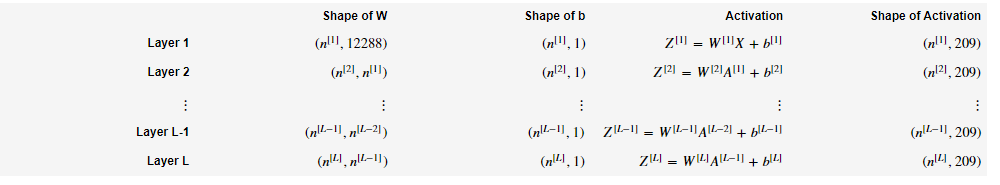



Hãy nhớ rằng khi chúng ta tính toán $W X + b$ trong python, nó thực hiện phát sóng. Ví dụ, nếu: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Thì $WX + b$ sẽ như này:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Bài tập**: Thực hiện khởi tạo cho Mạng thần kinh lớp L.

**Hướng dẫn**:

* Cấu trúc của mô hình là *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID* .Tức là nó có lớp $ L-1 $ sử dụng chức năng kích hoạt ReLU theo sau là lớp đầu ra có chức năng kích hoạt sigmoid.

* Sử dụng khởi tạo ngẫu nhiên cho các ma trận tham số w. Sử dụng `np.random.randn (shape) * 0.01`.

- Sử dụng khởi tạo các số không cho các bias. Sử dụng `np.zeros (shape)`.

* Chúng tôi sẽ lưu trữ $ n ^ {[l]} $, số lượng đơn vị trong các lớp khác nhau, trong một biến `layer_dims`.Ví dụ: `layer_dims` cho" Mô hình phân loại dữ liệu phẳng "từ tuần trước sẽ là [2,4,1]: 
        Có hai đầu vào, một lớp ẩn với 4 đơn vị ẩn và một lớp đầu ra có 1 đơn vị đầu ra .
        Điều này có nghĩa là hình dạng của `W1` là (4,2),` b1` là (4,1), `W2` là (1,4) và` b2` là (1,1).
        Bây giờ bạn sẽ tổng quát điều này thành các L lớp

* Đây là cách triển khai cho $ L = 1 $ (mạng nơ-ron một lớp). Nó sẽ truyền cảm hứng cho bạn để triển khai trường hợp chung (mạng nơ-ron lớp L).

```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [9]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W'+str(l)] =np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [10]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

3
W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td>W1</td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>b1 </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>W2 </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>b2</td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
</table>

## 4 - Forward propagation module

### 4.1 - Linear Forward 
Bây giờ bạn đã khởi tạo các tham số của mình, bạn sẽ thực hiện mô-đun lan truyền thuận. Bạn sẽ bắt đầu bằng cách thực hiện một số chức năng cơ bản mà bạn sẽ sử dụng sau này khi thực hiện mô hình. Bạn sẽ hoàn thành ba chức năng theo thứ tự sau:

- LINEAR
- LINEAR -> ACTIVATION ở vị trí ACTIVATION sẽ là một trong hai  ReLU hoặc Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

Mô-đun Linear Forward  (được vectơ hóa trên tất cả các ví dụ) tính toán các phương trình sau: 

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

Khi $A^{[0]} = X$. 

**Bài tập**: Xây dựng phần Linear Forward của quá trình lan truyền thuận.

**Nhắc nhở**:
Biểu diễn toán học của đơn vị này là $ Z ^ {[l]} = W ^ {[l]} A ^ {[l-1]} + b ^ {[l]} $. Bạn cũng có thể thấy `np.dot ()` hữu ích. Nếu kích thước của bạn không khớp, việc dùng `W.shape` có thể hữu ích.

In [12]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A)+b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [13]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**kết quả mong đợi**:

<table style = "width: 35%">
  
   <tr>
     <td> Z  </td>
     <td> [[3.26295337 -1.23429987]] </td>
   </tr>
  
</table>

### 4.2 - Linear-Activation Forward

Trong sổ tay này, bạn sẽ sử dụng hai chức năng kích hoạt:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. Chúng tôi đã cung cấp cho bạn hàm `sigmoid`. Hàm này trả về **hai** item: giá trị kích hoạt "` a` "và" `cache`" có chứa "` Z` "(đó là những gì chúng ta sẽ đưa vào hàm backward tương ứng). Để sử dụng nó, bạn chỉ cần gọi:
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: Công thức toán học cho ReLu là $A = RELU(Z) = max(0, Z)$. Chúng tôi đã cung cấp cho bạn chức năng `relu`. Hàm này trả về **hai** item: giá trị kích hoạt "` A` "và" `cache`" có chứa "` Z` "(đó là những gì chúng ta sẽ đưa vào hàm backward  tương ứng). Để sử dụng nó, bạn chỉ cần gọi:
``` python
A, activation_cache = relu(Z)
```

Để thuận tiện hơn, bạn sẽ nhóm hai chức năng (Linear và Activation) thành một chức năng (LINEAR->ACTIVATION).
Do đó, bạn sẽ triển khai một hàm thực hiện bước tiến LINEAR, theo sau là bước chuyển tiếp ACTIVATION .

**Bài tập**: Thực hiện lan truyền thuận của lớp *LINEAR-> ACTIVATION*. Công thức toán học là: $ A ^ {[l]} = g (Z ^ {[l]}) = g (W ^ {[l]} A ^ {[l-1]} + b ^ {[l]} ) $ trong đó kích hoạt "g" có thể là sigmoid () hoặc relu (). Sử dụng  linear_forward() và hàm hai chức năng kích hoạt.

In [24]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A,activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A,activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [25]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**Kết quả mong đợi**:
       
<table style="width:35%">
  <tr>
    <td> With sigmoid: A </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> With ReLU: A  </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>

**Lưu ý**: Trong học sâu, phép tính "[LINEAR-> ACTIVATION]" được tính là một lớp trong mạng nơ-ron chứ không phải hai lớp.

### d) L-Layer Model 

Để thuận tiện hơn nữa khi triển khai $L$- lớp Neural Net, bạn sẽ cần một chức năng sao chép chức năng trước đó (`linear_activation_forward` với RELU) $L-1$ times, rồi tiếp theo sau đó với một `linear_activation_forward` với SIGMOID.

<img src="images/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **Figure 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>


**Bài tập**: Thực hiện lan truyền thuận của mô hình trên.

**Chỉ dẫn**: Trong đoạn mã dưới đây, biến `AL` sẽ biểu thị $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (Điều này đôi khi còn được gọi là `Yhat`, tương tự, Đây là  $\hat{Y}$.) 

**Gợi ý**:
- Sử dụng các chức năng bạn đã viết trước đó
- Sử dụng vòng lặp for để tái tạo [LINEAR->RELU] (L-1) thời gian
- Đừng quên theo dõi các caches trong danh sách "caches. Để thêm giá trị mới `c` vào`list`, bạn có thể sử dụng `list.append (c)`.

In [26]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    for l in range(1,L):
        A_prev = A
        A,cache = linear_activation_forward(A_prev,parameters['W'+str(l)], parameters['b'+str(l)],'relu')
        caches.append(cache)
    ### END CODE HERE ###
    AL,cache = linear_activation_forward(A,parameters['W'+str(L)], parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))

    return AL, caches

In [27]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td>AL</td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td>Length of caches list </td>
    <td > 3 </td> 
  </tr>
</table>

Tuyệt quá! Bây giờ bạn có lan truyền thuận đầy đủ lấy đầu vào X và xuất ra một vectơ hàng $ A ^ {[L]} $ chứa các dự đoán của bạn. 
Nó cũng ghi lại tất cả các giá trị trung gian trong "caches". Sử dụng $ A ^ {[L]} $, bạn có thể tính toán chi phí dự đoán của mình.

## 5 - Cost function

Bây giờ bạn sẽ thực hiện truyền tiến và truyền lùi. Bạn cần tính toán chi phí, bởi vì bạn muốn kiểm tra xem mô hình của bạn có thực sự đang học hay không.

**Tập thể dục**: Tính toán cross-entropy chi phí $J$, sử dụng công thức sau: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [28]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [23]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793422


**Kết quả mong đợi**:
<table>
    <tr>
    <td> cost </td>
    <td> 0.2797765635793422</td> 
    </tr>
</table>

## 6 - Backward propagation module

Cũng giống như với lan truyền thuận, bạn sẽ triển khai các hàm trợ giúp cho việc lan truyền ngược. Hãy nhớ rằng truyền ngược được sử dụng để tính toán gradient của hàm mất mát liên quan đến các tham số.

**Nhắc nhở**: 
<img src="images/backprop_kiank.png" style="width:650px;height:250px;">
<caption><center> 
**Figure 3** : Chuyển tiếp và lan truyền ngược cho *LINEAR->RELU->LINEAR->SIGMOID* <br> *Chúng ta các khối màu tím đại diện cho sự lan truyền thuận và các khối màu đỏ đại diện cho sự lan truyền ngược lại.*  </center></caption>

<!-- 
Đối với những bạn là chuyên gia về giải tích (bạn không cần phải làm bài tập này), quy tắc chuỗi của phép tính có thể được sử dụng để tính đạo hàm của sự mất mát $\mathcal{L}$ đối với $z^{[1]}$ trong mạng 2 lớp như sau:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

Để tính toán gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, bạn sử dụng quy tắc chuỗi trước đó và bạn làm $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. Trong quá trình backpropagation, ở mỗi bước, bạn nhân gradient hiện tại của mình với gradient tương ứng với lớp cụ thể để có được gradient bạn muốn.

Tương tự, để tính toán gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, bạn sử dụng quy tắc chuỗi và $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

Đây là lý do tại sao chúng ta nói về ** backpropagation **.
!-->

Bây giờ, tương tự như truyền tiến, bạn sẽ xây dựng truyền ngược theo ba bước:
- LINEAR backward
- LINEAR -> ACTIVATION backward ở vị trí ACTIVATION tính toán dẫn xuất kích hoạt ReLU hoặc sigmoid
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

### 6.1 - Linear backward

Cho lớp $l$, phần tuyến tính là: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (tiếp theo là một kích hoạt).

Giả sử bạn đã tính toán đạo hàm $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. Bạn muốn có được $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **Figure 4** </center></caption>

3 Đầu ra $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ được tính toán bằng cách sử dụng đầu vào $dZ^{[l]}$.Đây là công thức bạn cần:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

**Bài tập**: Sử dụng 3 công thức trên để triển khai linear_backward ().

In [31]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ## START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m )* np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    ## END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [32]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


**Kết quả mong đợi**:
    
```
dA_prev = 
 [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = 
 [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = 
 [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
```

### 6.2 - Linear-Activation backward

Tiếp theo, bạn sẽ tạo một hàm kết hợp hai hàm trợ giúp: **`linear_backward`** và backward để kích hoạt **`linear_activation_backward`**. 

Để giúp bạn thực hiện `linear_activation_backward`, chúng tôi đã cung cấp hai hàm backward :
- **`sigmoid_backward`**: Thực hiện truyền ngược cho đơn vị SIGMOID. Bạn có thể gọi nó như sau:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Thực hiện truyền ngược cho đơn vị RELU. Bạn có thể gọi nó như sau:

```python
dZ = relu_backward(dA, activation_cache)
```

Nếu $g(.)$ nó là hàm kích hoạt, 
`sigmoid_backward` và `relu_backward` tính toán $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Bài tập**: Triển khai backpropagation cho *LINEAR->lớp ACTIVATION* .

In [35]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ =relu_backward(dA, activation_cache)
        dA_prev, dW, db =linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [36]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
    <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 
  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr>  
    <tr>
    <td > db </td> 
        <td > [[-0.05729622]] </td> 
  </tr> 
</table>



**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 
  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr> 
    <tr>
    <td > db </td> 
           <td > [[-0.20837892]] </td> 
  </tr> 
</table>



### 6.3 - L-Model Backward

Bây giờ bạn sẽ thực hiện lan truyenf ngược cho vô số lớp. Nhớ lại rằng khi bạn triển khai hàm `L_model_osystem`, ở mỗi lần lặp lại, bạn đã lưu trữ một bộ đệm ẩn chứa (X, W, b và z). Trong mô-đun lan truyền ngược, bạn sẽ sử dụng các biến đó để tính toán độ dốc. Do đó, trong hàm `L_model_backward`, bạn sẽ lặp lại tất cả các lớp ẩn trở lại, bắt đầu từ lớp $ L $. Trên mỗi bước, bạn sẽ sử dụng các giá trị được lưu trong bộ nhớ cache cho lớp $ l $ để sao chép thông qua lớp $ l $. Hình 5 dưới đây cho thấy đường chuyền lùi.

<img src="images/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass  </center></caption>

** Khởi tạo backpropagation **:
Để nhân rộng thông qua mạng này, chúng tôi biết rằng đầu ra là,
$ A ^ {[L]} = \ sigma (Z ^ {[L]}) $. Do đó, mã của bạn cần phải tính `dAL` $ = \ frac {\ part \ mathcal {L}} {\ part A ^ {[L]}} $.
Để làm như vậy, hãy sử dụng công thức này (được suy ra bằng phép tính mà bạn không cần kiến thức chuyên sâu):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

Sau đó, bạn có thể sử dụng gradient `dAL` sau kích hoạt này để tiếp tục lùi lại. Như đã thấy trong Hình 5, bây giờ bạn có thể nhập `dAL` vào hàm lùi LINEAR-> SIGMOID mà bạn đã triển khai (sẽ sử dụng các giá trị được lưu trong bộ nhớ cache được lưu trữ bởi hàm L_model_osystem). Sau đó, bạn sẽ phải sử dụng vòng lặp `for` để lặp qua tất cả các lớp khác bằng cách sử dụng hàm lùi LINEAR-> RELU. Bạn nên lưu trữ từng dA, dW và db trong từ điển grads. Để làm như vậy, hãy sử dụng công thức sau:

$$grads["dW" + str(l)] = dW^{[l]}\tag{15}$$

Ví dụ: đối với $ l = 3 $, điều này sẽ lưu trữ $ dW ^ {[l]} $ trong `grads [" dW3 "]`.

** Bài tập **: Triển khai backpropagation cho mô hình *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model

In [39]:
#GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    #grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = None
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approcurrent_cachex. 5 lines)
        current_cache = caches[l]
        grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] = linear_activation_backward(grads["dA" + str(l + 1)],current_cache ,activation = "relu")
        ### END CODE HERE ###

    return grads

In [40]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


**Kết quả mong đợi**

<table style="width:60%">
  <tr>
    <td > dW1 </td> 
           <td > [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]] </td> 
  </tr> 
    <tr>
    <td > db1 </td> 
           <td > [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] </td> 
  </tr> 
  <tr>
  <td > dA1 </td> 
           <td > [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]] </td> 
  </tr> 
</table>

### 6.4 - Update Parameters

Trong phần này, bạn sẽ cập nhật các thông số của mô hình, sử dụng gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

Khi $\alpha$ là learning rate. Sau khi tính toán các tham số đã cập nhật, hãy lưu trữ chúng trong từ điển tham số.

**Bài tập**: Thực hiện `update_parameters()` để cập nhật các thông số của bạn bằng cách sử dụng gradient descent.

**Hướng dẫn**:
Cập nhật các thông số bằng cách sử dụng gradient descent trên mọi $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 


In [53]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] -learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] -learning_rate*grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

In [54]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:
<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>

## 7. Kết luận

Chúc mừng bạn đã triển khai tất cả các chức năng cần thiết để xây dựng một mạng nơ-ron sâu!

Chúng tôi biết đó là một nhiệm vụ dài nhưng càng về sau, nó sẽ càng ngày càng tốt hơn. Phần tiếp theo của bài tập dễ dàng hơn.

Trong nhiệm vụ tiếp theo, bạn sẽ kết hợp tất cả những thứ này lại với nhau để xây dựng hai mô hình:
- Mạng nơron hai lớp
- Mạng nơron lớp L

Trên thực tế, bạn sẽ sử dụng những mô hình này để phân loại hình ảnh mèo và không phải mèo!